In [1]:
# Objetivo: detectar qué productos son los más comprados por ciertos grupos etarios.
# Subgrupos 18–24, 25–30, 31–35 , 35-99

<h4>1.Fase de Análisis exploratorio</h4>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
df_customer = pd.read_csv('https://raw.githubusercontent.com/micaelakorol21/datasets/refs/heads/main/customer_data.csv')

In [3]:
df_customer.shape

(100000, 12)

In [4]:
# Renombramos las columnas:

df_customer.columns = [
    'id',
    'edad',
    'genero',
    'ingresos',
    'educacion',
    'region',
    'fidelidad',
    'frecuencia_compra',
    'importe_compra',
    'categoria_producto',
    'cupon_promocion',
    'satisfaccion'
]


In [5]:
df_customer.isna().sum()

id                    0
edad                  0
genero                0
ingresos              0
educacion             0
region                0
fidelidad             0
frecuencia_compra     0
importe_compra        0
categoria_producto    0
cupon_promocion       0
satisfaccion          0
dtype: int64

In [6]:
df_customer.dtypes

id                     int64
edad                   int64
genero                object
ingresos               int64
educacion             object
region                object
fidelidad             object
frecuencia_compra     object
importe_compra         int64
categoria_producto    object
cupon_promocion        int64
satisfaccion           int64
dtype: object

In [7]:
# Observamos el promedio de ingreso:
df_customer['ingresos'].describe()

count    100000.000000
mean      27516.269880
std       12996.782587
min        5000.000000
25%       16271.750000
50%       27584.500000
75%       38747.250000
max       50000.000000
Name: ingresos, dtype: float64

In [8]:
# Importe de la compra promedio entre hombres y mujeres:
df_customer.groupby("genero")["importe_compra"].mean()

genero
Female    9634.404601
Male      9635.178224
Name: importe_compra, dtype: float64

In [113]:
# Categorias mas vendidas
df_customer.groupby("categoria_producto")["importe_compra"].mean()

categoria_producto
Beauty         9714.333201
Books          9594.366514
Clothing       9634.118447
Electronics    9646.397436
Food           9667.944471
Health         9611.869117
Home           9538.549585
Name: importe_compra, dtype: float64

In [115]:
# Cuantas categorias hay:
df_customer['categoria_producto'].value_counts()

categoria_producto
Electronics    29957
Clothing       19933
Books          14878
Food           14785
Health         10093
Home            5062
Beauty          5024
Name: count, dtype: int64

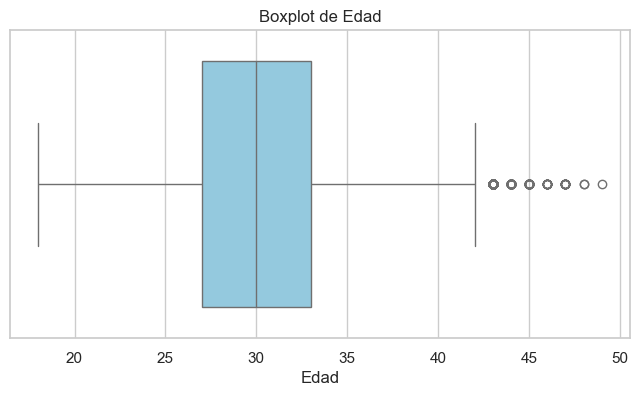

In [117]:
sns.set(style="whitegrid")

# Boxplot de edad
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_customer["edad"], color="skyblue")
plt.title("Boxplot de Edad")
plt.xlabel("Edad")
plt.show()

In [121]:
df_customer['edad'].describe()

count    99732.000000
mean        30.040348
std          4.428634
min         18.000000
25%         27.000000
50%         30.000000
75%         33.000000
max         49.000000
Name: edad, dtype: float64

In [ ]:
# Eliminamos los menores de 18 años, ya qye nuestro análisis se centra > 18 hasta 99 años.

In [123]:
df_customer = df_customer[df_customer['edad'] >= 18]

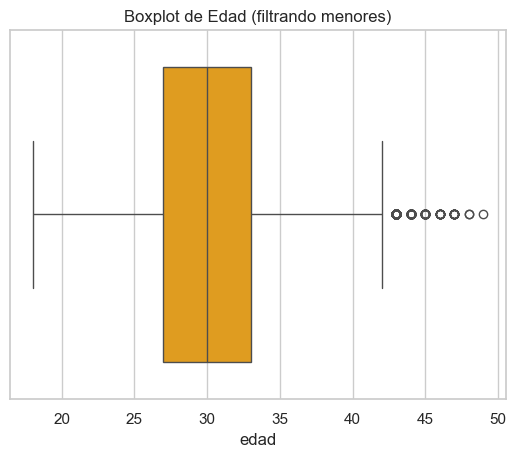

In [125]:
sns.boxplot(x=df_customer["edad"], color="orange")
plt.title("Boxplot de Edad (filtrando menores)")
plt.show()

<h4>Analizamos la columna gender: </h4>

In [127]:
# Cuántos registros hay de cada género:
df_customer['genero'].value_counts()

genero
Female    49953
Male      49779
Name: count, dtype: int64

In [129]:
# Porcentaje de representación de cada género:
df_customer['genero'].value_counts(normalize=True) * 100

genero
Female    50.087234
Male      49.912766
Name: proportion, dtype: float64

In [55]:
# Gasto promedio por género:
df_customer.groupby('gender')['purchase_amount'].mean()

gender
Female    9633.442896
Male      9634.217742
Name: purchase_amount, dtype: float64

<Axes: xlabel='genero', ylabel='importe_compra'>

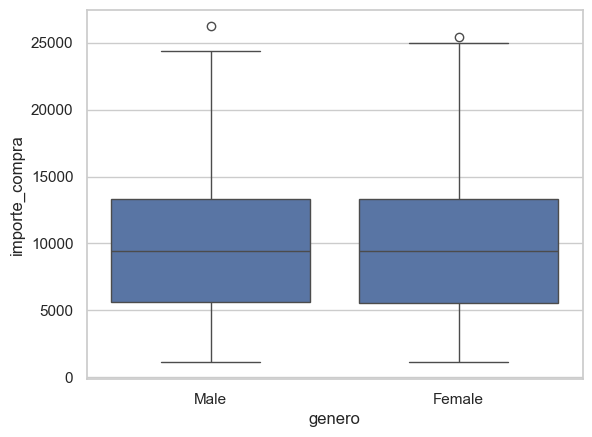

In [131]:
sns.boxplot(data=df_customer, x='genero', y='importe_compra')

In [ ]:
# El 25% de los compradores, gastó $6000 aprox.
# El 50% de los compradores, gastó 9500 aprox.
# El otro 25% gastó 13.500 aprox. El 75% de los compradores, gastó menos que Q3.

In [133]:
# Frecuencia de compra por género
df_customer.groupby('genero')['frecuencia_compra'].value_counts(normalize=True)

genero  frecuencia_compra
Female  rare                 0.500951
        occasional           0.298140
        frequent             0.200909
Male    rare                 0.499427
        occasional           0.299564
        frequent             0.201008
Name: proportion, dtype: float64

In [135]:
# Preferencias de categoria 
df_customer.groupby('genero')['categoria_producto'].value_counts(normalize=True)

genero  categoria_producto
Female  Electronics           0.301363
        Clothing              0.200829
        Food                  0.149040
        Books                 0.148299
        Health                0.100855
        Home                  0.050367
        Beauty                0.049246
Male    Electronics           0.299383
        Clothing              0.198899
        Books                 0.150063
        Food                  0.147452
        Health                0.101549
        Beauty                0.051508
        Home                  0.051146
Name: proportion, dtype: float64

In [139]:
# 1. Contar frecuencia absoluta por género y categoría
counts = df_customer.groupby(['genero', 'categoria_producto']).size().reset_index(name='count')

# 2. Calcular total por género para normalizar
totals = counts.groupby('genero')['count'].transform('sum')

# 3. Calcular proporción dentro de cada género
counts['proportion'] = counts['count'] / totals

counts.head()

,genero,categoria_producto,count,proportion
0,Female,Beauty,2460,0.049246
1,Female,Books,7408,0.148299
2,Female,Clothing,10032,0.200829
3,Female,Electronics,15054,0.301363
4,Female,Food,7445,0.149040


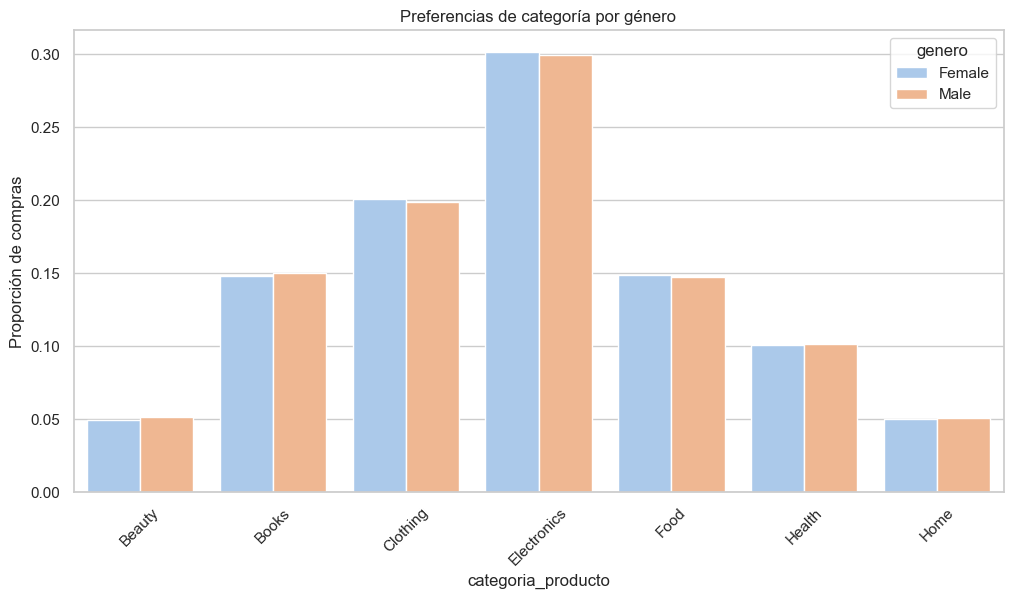

In [141]:
plt.figure(figsize=(12,6))
sns.barplot(data=counts, x='categoria_producto', y='proportion', hue='genero', palette='pastel')
plt.title('Preferencias de categoría por género')
plt.ylabel('Proporción de compras')
plt.xticks(rotation=45)
plt.show()

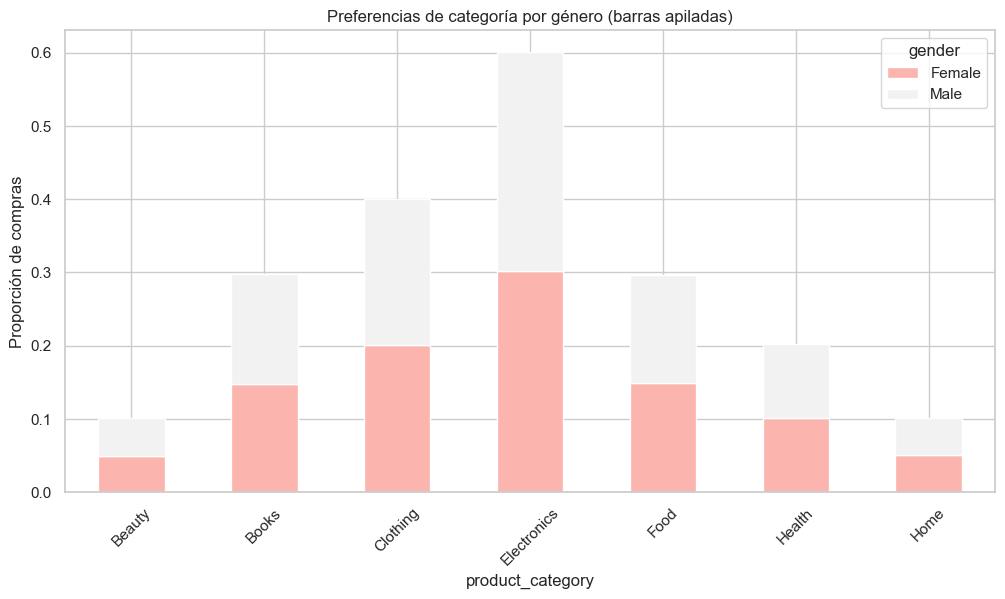

In [83]:
pivot_df = counts.pivot(index='product_category', columns='gender', values='proportion')

pivot_df.plot(kind='bar', stacked=True, figsize=(12,6), colormap='Pastel1')
plt.title('Preferencias de categoría por género (barras apiladas)')
plt.ylabel('Proporción de compras')
plt.xticks(rotation=45)
plt.show()

<b>La distribución y preferencias de productos entre hombres y mujeres son muy similares, lo que coincide con que ambos géneros están representados casi por igual en la muestra.</b>

In [87]:
df_customer.columns

Index(['id', 'age', 'gender', 'income', 'education', 'region',
       'loyalty_status', 'purchase_frequency', 'purchase_amount',
       'product_category', 'promotion_usage', 'satisfaction_score'],
      dtype='object')

<h4>Columna 'Ingresos'</h4>

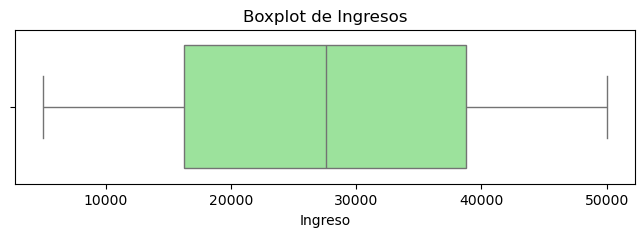

In [18]:
plt.figure(figsize=(8, 2))
sns.boxplot(x=df_customer['ingresos'], color='lightgreen')
plt.title('Boxplot de Ingresos')
plt.xlabel('Ingreso')
plt.show()

<b>Los valores están razonablemente distribuidos y no hay ingresos extremos que puedan distorsionar el análisis </b>

In [20]:
df_customer.columns

Index(['id', 'edad', 'genero', 'ingresos', 'educacion', 'region', 'fidelidad',
       'frecuencia_compra', 'importe_compra', 'categoria_producto',
       'cupon_promocion', 'satisfaccion'],
      dtype='object')

<h4>Análisis de la columna "Educación" </h4>

In [22]:
df_customer['educacion'].value_counts()

educacion
College       39874
Bachelor      30279
HighSchool    20031
Masters        9816
Name: count, dtype: int64

<h4>Análisis de la columna "Fidelidad" </h4>

In [27]:
df_customer['fidelidad'].dtype

dtype('O')

<h4>Análisis de la columna "frecuencia_compra" </h4>

In [30]:
df_customer['frecuencia_compra'].dtype

dtype('O')

In [32]:
# Mapa de correlacion entre variables: Muestra qué variables están más relacionadas entre sí.
# Observar features más importantes
# Realizar discretización por grupo etario

In [34]:
# Ejecutar despues de ver los outliers
#sns.heatmap(df_customer.corr(numeric_only=True), annot=True, cmap="coolwarm")

In [32]:
# El ingreso de una persona esta relacionado con lo que gasta.
# La edad con la puntuación de satisfacción esta fuertemente relacionada.
# El uso de promociones esta algo relacionado con el ingreso.